# Description
Scoring peptides to a weight matrix

## Python Imports

In [28]:
import numpy as np
from pprint import pprint

from scipy.stats import pearsonr
import matplotlib.pyplot as plt

from sklearn.metrics import roc_curve, auc, precision_recall_curve, average_precision_score

%matplotlib inline

## DEFINE THE PATH TO YOUR COURSE DATA DIRECTORY

In [2]:
data_dir = "/Users/alberteenglund/Documents/DTU/8_Semester/22125_algorithms_in_bioinformatics/algorithms/BioAlgoProject2025/data/"

## Initialize Matrix

In [3]:
def initialize_matrix(peptide_length, alphabet):

    init_matrix = [0]*peptide_length

    for i in range(0, peptide_length):

        row = {}

        for letter in alphabet: 
            row[letter] = 0.0

        #fancy way:  row = dict( zip( alphabet, [0.0]*len(alphabet) ) )

        init_matrix[i] = row
        
    return init_matrix

### Load Matrix from PSI-BLAST format

In [4]:
def from_psi_blast(file_name):

    f = open(file_name, "r")
    
    nline = 0
    for line in f:
    
        sline = str.split( line )
        
        if nline == 0:
        # recover alphabet
            alphabet = [str]*len(sline)
            for i in range(0, len(sline)):
                alphabet[i] = sline[i]
                
            matrix = initialize_matrix(peptide_length, alphabet)
        
        else:
            i = int(sline[0])
            
            for j in range(2,len(sline)):
                matrix[i-1][alphabet[j-2]] = float(sline[j])
                
        nline+= 1
            
    return matrix

### Score peptide to mat

In [5]:
def score_peptide(peptide, matrix):
    acum = 0
    for i in range(0, len(peptide)):
        acum += matrix[i][peptide[i]]
    return acum

## Main

ADLRFASEF -0.16419999999999998 0.084687
AFVRFSTDK -0.08710000000000001 0.0
AILHNIYRL 0.35640000000000005 0.642711
ALAKAAAAI 0.39880000000000004 0.549628
ALAKAAAAV 0.38470000000000004 0.65215
ALCRWGLLL 0.4697 0.574375
ALIRILQQL 0.6957000000000001 0.691699
ALVARAAVL 0.4008999999999999 0.139013
AQLYAYAGF 0.169 0.084687
ATYGIIVPV 0.5231 0.892498
AYLLQHLDL 0.24210000000000004 0.084687
DAYGFHNYK -0.2772 0.084687
DLNIFMTLV 0.3427 0.351398
DQTHIKTIA -0.06820000000000004 0.037659
DTCLLAISA -0.14390000000000003 0.18586
DTVNRTHQY -0.19880000000000003 0.084687
DVRTLLGLI 0.1682 0.0
EADPTGHSY -0.3959 0.084687
EGIEGRIAY -0.14550000000000002 0.084687
ELESQISEL 0.24470000000000003 0.0
EMMAKEEEL 0.4144 0.253308
ETGLSASDV -0.24100000000000002 0.0
ETVKMGAFM -0.08230000000000007 0.0
EVMPEKRNV 0.10429999999999996 0.259032
FIKGFLYHT 0.5213 0.335523
FLGGTPVCL 0.6652 0.494234
FLLIRYITT 0.7185000000000001 0.645733
FLWGPRALI 0.8149 0.494196
FLYNRPLSV 0.7839 0.539398
FMFSTVATI 0.7767999999999998 0.649429
FMYFCEQK

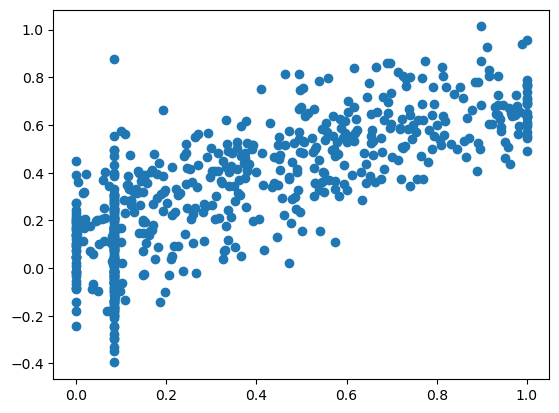

In [31]:
# Read evaluation data
#evaluation_file = "https://raw.githubusercontent.com/brunoalvarez89/data/master/algorithms_in_bioinformatics/part_2/A0201.eval"
evaluation_file = data_dir + "all_files_new/A0201/e000.csv"

evaluation = np.loadtxt(evaluation_file, dtype=str).reshape(-1,3)

evaluation_peptides = evaluation[:, 0]
evaluation_targets = evaluation[:, 1].astype(float)


evaluation_peptides, evaluation_targets

peptide_length = len(evaluation_peptides[0])

# Define which PSSM file to use (file save from pep2mat)
pssm_file = "/Users/alberteenglund/Documents/DTU/8_Semester/22125_algorithms_in_bioinformatics/algorithms/BioAlgoProject2025/results/SMM/gradient_decent/A0201.res/l.0.1/mat.1"

w_matrix = from_psi_blast(pssm_file)

evaluation_predictions = []
for i in range(len(evaluation_peptides)):
    score = score_peptide(evaluation_peptides[i], w_matrix)
    evaluation_predictions.append(score)
    print (evaluation_peptides[i], score, evaluation_targets[i])
    
pcc = pearsonr(evaluation_targets, evaluation_predictions)
print("PCC: ", pcc[0])

plt.scatter(evaluation_targets, evaluation_predictions);


y_true:  [0 0 1 1 1 1 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 0 1 1 0 0 1
 1 1 1 1 0 0 0 1 0 1 1 0 1 0 0 1 1 1 1 1 0 0 0 0 0 1 1 0 1 0 1 0 0 0 0 0 0
 1 0 1 1 0 0 0 0 1 0 1 0 1 1 0 0 0 0 1 0 1 0 1 1 1 1 0 1 0 0 0 1 0 0 1 1 1
 1 0 0 0 0 0 1 1 1 1 1 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 1 1 1 0 1 0 0 1 0 0 1 0 1 1 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 0 1 1 1 0 0
 0 0 1 0 1 0 0 1 0 0 1 0 0 0 1 0 0 1 0 1 0 0 0 1 0 1 1 0 0 0 0 1 0 1 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 1 1 1 1 1 1 1 0 0 0 1 0 0 1 0 0 1 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 1 1 0 1 1 0 0 1 1 0 0 0 0 0 0 0 0 1 0 1 0 0
 0 0 0 1 1 0 0 1 1 0 0 1 1 1 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1
 0 0 0 0 0 0 0 1 1 1 1 0 0 0 1 1 0 0 0 0 0 1 1 1 1 0 1 1 1 0 1 1 1 0 0 1 0
 0 0 0 1 1 1 0 0 0 0 1 0 0 0 0 0 0 0 0 1 1 0 0 1 0 1 1 1 0 1 1 0 1 0 0 0 1
 1 1 0 0 0 0 1 1 1 1 1 0 0 0 0 0 0 0 1 0 0 0 0 0 1 1 0 1 0 0 0 0 1 1 0 1 1
 1 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 1 1 1 1 0 0 0 0 1 1 0 0 0 0 1 1 1
 1 1 0 1 0 0 1 0

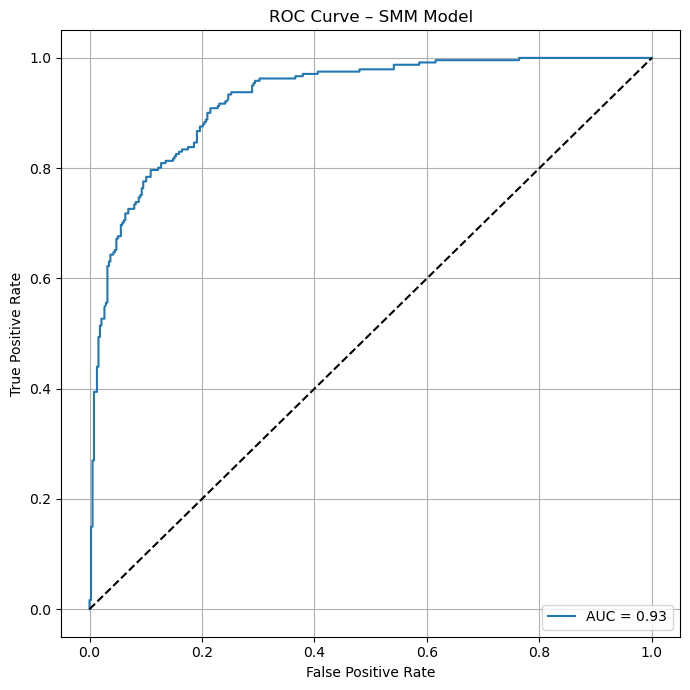

In [ ]:
# ========================
# ROC-AUC ANALYSIS
# ========================

# Define threshold for binder classification
BINDER_THRESHOLD = 0.426

# Convert targets to binary labels
y_true = np.where(evaluation_targets >= BINDER_THRESHOLD, 1, 0)
y_score = evaluation_predictions

# Compute ROC curve and AUC
fpr, tpr, _ = roc_curve(y_true, y_score)
roc_auc = auc(fpr, tpr)
print("ROC-AUC: ", round(roc_auc, 4))

# Plot ROC curve
plt.figure(figsize=(7, 7))
plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.2f}")
plt.plot([0, 1], [0, 1], linestyle='--', color='black')
plt.title("ROC Curve – SMM Model")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout()
plt.savefig("smm_roc_auc_plot.png")
plt.show()

Average Precision (AP): 0.8858


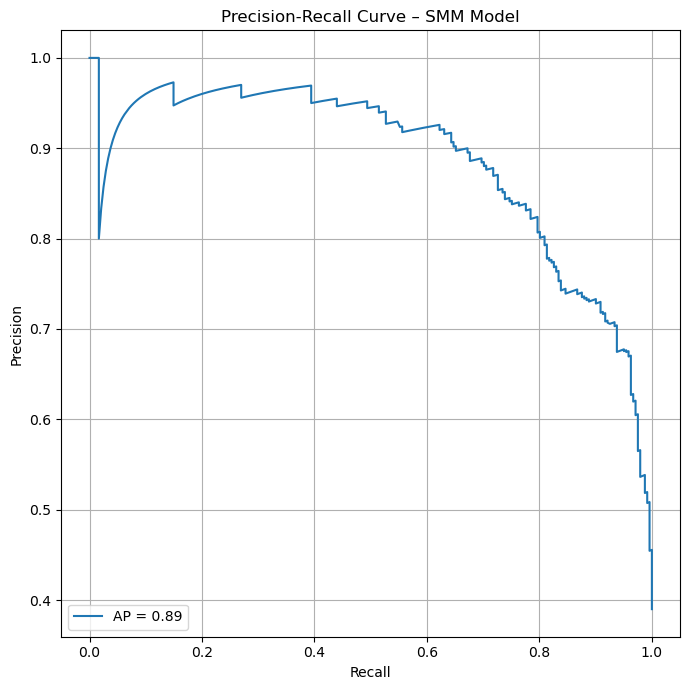

In [33]:
# Precision-Recall Curve
precision, recall, _ = precision_recall_curve(y_true, y_score)
average_precision = average_precision_score(y_true, y_score)
print("Average Precision (AP):", round(average_precision, 4))

# Plot Precision-Recall Curve
plt.figure(figsize=(7, 7))
plt.plot(recall, precision, label=f"AP = {average_precision:.2f}")
plt.title("Precision-Recall Curve – SMM Model")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.legend(loc="lower left")
plt.grid(True)
plt.tight_layout()
plt.savefig("smm_precision_recall_curve.png")
plt.show()


In [34]:
threshold = 0.426  # or tune this
y_pred = np.where(np.array(y_score) >= threshold, 1, 0)

from sklearn.metrics import confusion_matrix

tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()

sensitivity = tp / (tp + fn)  # recall
specificity = tn / (tn + fp)

print(f"Sensitivity (Recall): {sensitivity:.4f}")
print(f"Specificity: {specificity:.4f}")


Sensitivity (Recall): 0.7967
Specificity: 0.8833
